In [13]:
# import
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal
%matplotlib notebook
sns.set()

In [14]:
def trinomialmodel(S0,K,T,risk_free,volatility,n,div,optiontype='call'):
    dT=T/n
    u=math.exp(volatility*math.sqrt(dT/2))
    u1=math.pow(u,2)
    u2=1
    u3=math.pow(u,-2)
    b=risk_free-div
    p=1/2+1/2*(b-1/2*volatility**2)*((math.sqrt(dT)/2)/volatility)
    p1=math.pow(p,2)
    p2=2*p*(1-p)
    p3=math.pow((1-p),2)
    e=math.exp(-risk_free*dT)
    S=np.zeros(int(math.pow(n+1,2)))
    S[0]=S0
    nr=0
    ok=0
    nr2=5
    S[1]=S[0]*u1
    S[2]=S[0]
    S[3]=S[0]*u3
    for i in range(4,int(math.pow(n+1,2))):
        if  ok==1 and nr<nr2:
            S[i]=S[i-nr2+1]
            nr=nr+1
        if ok==0:
            S[i]=S[i-nr2+2]*u1
            ok=1
            nr=nr+1
        if nr==nr2:
            S[i]=S[i-nr2]*u3
            nr=0
            nr2=nr2+2
            ok=0
    V=np.zeros(len(S))
    nr=0
    nr2=(n-1)*2+1
    ok=n*2+1
    nr3=n*2+1
    for i in range(0,len(S)):
        if ok>0:
            if optiontype=='call':
                V[len(S)-1-i]=S[len(S)-1-i]-K
                V[len(S)-1-i]=f"{  V[len(S)-1-i]:.3f}"    
            else :
                V[len(S)-1-i]=K-S[len(S)-1-i]
            if V[len(S)-1-i]<0:
                V[len(S)-1-i]=0
            ok=ok-1
        else:
            nr=nr+1
            V[len(S)-1-i]=e*(p3*V[len(S)-i-1+nr3]+p2*V[len(S)-i-1+nr3-1]+p1*V[len(S)-i-1+nr3-2])
            V[len(S)-1-i]=f"{  V[len(S)-1-i]:.3f}"                    
            if V[len(S)-1-i]<0:
                V[len(S)-1-i]=0
        if nr==nr2:
            nr=0
            nr2=nr2-2
            nr3=nr2+2
    G=nx.Graph()
    G.add_node(0,value=V[0],pos=(0,3))
    G.add_node(1,value=V[1],pos=(1,4))
    G.add_node(2,value=V[2],pos=(1,2))
    G.add_node(3,value=V[3],pos=(1,0))
    G.add_edge(0,1)
    G.add_edge(0,2)
    G.add_edge(0,3)
    nr=0
    nr2=5
    poz=5
    poz2=5
    poz3=2

    for i in range(4,len(S)):
        G.add_node(i,value=V[i],pos=(poz3,poz+1))
        nr=nr+1
        poz=poz-2
        if nr==nr2 :
            for j in range(i-nr-poz3,i-nr+1):
                G.add_edge(j,j+poz3+1)
                G.add_edge(j,j+poz3+2)
                G.add_edge(j,j+poz3+3)

            poz2=poz2+2
            poz=poz2
            nr=0
            poz3=poz3+2
            nr2=nr2+2
    labels={}
    for i in G:
        labels[i]=G.node[i]['value']         
    pos=nx.get_node_attributes(G,'pos')
    plt.figure()
    nx.draw_networkx(G,pos,labels,with_labels=False)
    nx.draw_networkx_labels(G,pos,labels)
    return V[0]

<IPython.core.display.Javascript object>


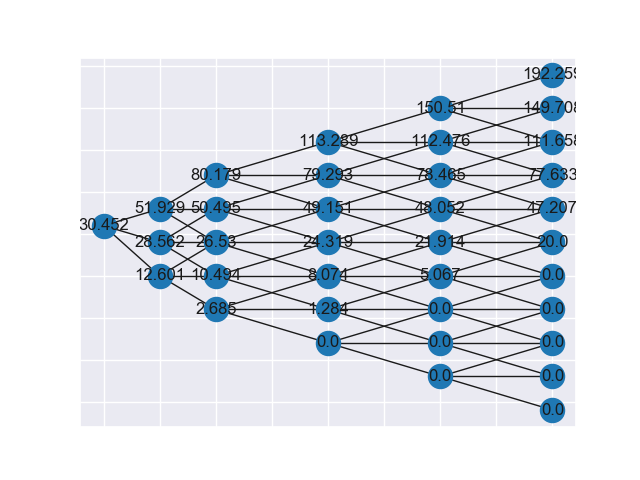

30.452


In [15]:
S0=230            # initial stock price
K=210             # strike price
T=0.5             # maturity time (in years)
risk_free=0.04545 # risk free
volatility=0.25   # standard devition of a stock randament
n=5               # time division
div=0             # divident
print(trinomialmodel(S0,K,T,risk_free,volatility,n,div,optiontype='call'))